## Data pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Dataset/SO_survey_results_19-20.csv')

C:\Users\Vinit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,2,4,5,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1.0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2.0,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3.0,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4.0,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5.0,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]] ##these are the only columns required for the model
df = df.rename({"ConvertedComp": "Salary"}, axis=1) ## ConvertedComp is salary in native currency converted to UsD
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df = df[df["Salary"].notnull()] ##we do not want null values.
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90579 entries, 7 to 152791
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       90579 non-null  object 
 1   EdLevel       89180 non-null  object 
 2   YearsCodePro  90278 non-null  object 
 3   Employment    90402 non-null  object 
 4   Salary        90579 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.1+ MB


In [6]:
df = df.dropna() ##To drop any data in above columns which is not a number.
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed full-time"] ##Changing data in such way that only data that remains is "employed full-time"
df = df.drop("Employment", axis=1) ##Droping the Employment column as it is not required.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78267 entries, 7 to 152791
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       78267 non-null  object 
 1   EdLevel       78267 non-null  object 
 2   YearsCodePro  78267 non-null  object 
 3   Salary        78267 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [8]:
df['Country'].value_counts()

United States     21447
India              6060
United Kingdom     5842
Germany            4978
Canada             3121
                  ...  
Belize                1
Niger                 1
Namibia               1
Benin                 1
Mali                  1
Name: Country, Length: 169, dtype: int64

In [9]:
## This func combines the categorical data that doesnt meet our cutoff.
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States         21447
Other                  8572
India                  6060
United Kingdom         5842
Germany                4978
Canada                 3121
France                 2407
Brazil                 2169
Australia              1738
Spain                  1728
Netherlands            1594
Poland                 1549
Russian Federation     1468
Italy                  1355
Sweden                 1318
Israel                  796
Turkey                  760
Switzerland             744
Ukraine                 679
Mexico                  640
Norway                  639
Belgium                 628
Pakistan                628
Austria                 587
Romania                 584
South Africa            581
Czech Republic          575
Ireland                 570
Denmark                 563
Portugal                528
Finland                 525
Iran                    522
Bulgaria                521
Argentina               486
New Zealand             477
Hungary             

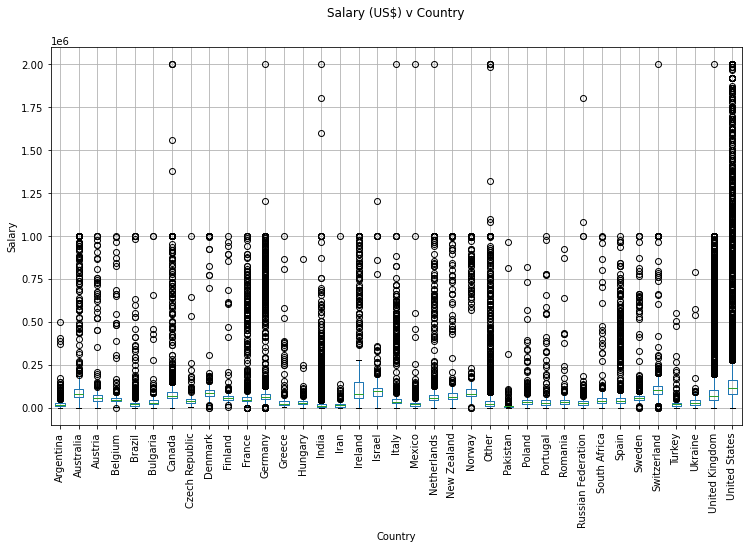

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax) ##This will show us the medians and the outliers.
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 120000] ##Above 120k dollars/anum is creating outliers.
df = df[df["Salary"] >= 10000] 
df = df[df['Country'] != 'Other']

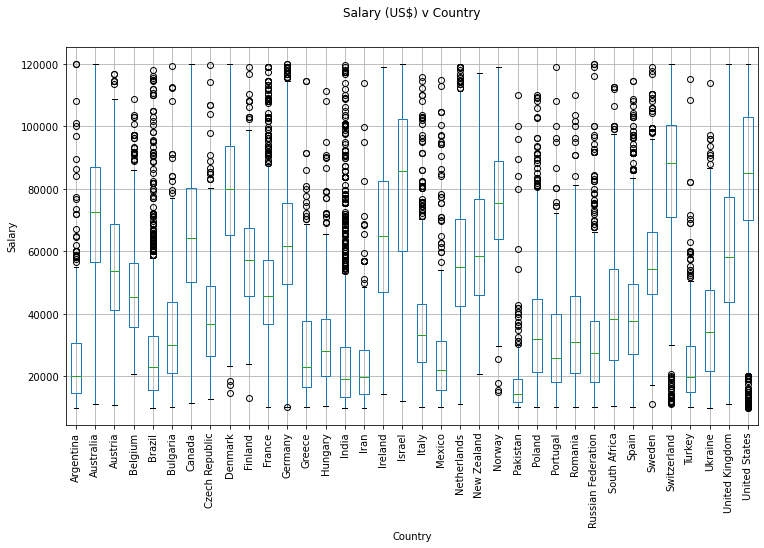

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '6', '28',
       '15', '25', '5', '9', '11', 'Less than 1 year', '8', '18', '32',
       '22', '38', '16', '26', '23', '27', '17', '30', '21', '19', '34',
       '29', '24', '31', '37', '36', '41', '35', '33', '42', '39', '45',
       '40', 'More than 50 years', '43', '44', '50', '47'], dtype=object)

In [15]:
##The values need to be in float
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5   
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [16]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 14. , 12. ,  6. ,
       28. , 15. , 25. ,  5. ,  9. , 11. ,  0.5,  8. , 18. , 32. , 22. ,
       38. , 16. , 26. , 23. , 27. , 17. , 30. , 21. , 19. , 34. , 29. ,
       24. , 31. , 37. , 36. , 41. , 35. , 33. , 42. , 39. , 45. , 40. ,
       50. , 43. , 44. , 47. ])

In [17]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education',
       'Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)', 'Associate degree'],
      dtype=object)

In [18]:
##Edlevel catagories need to be simplified.
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder as LE 

In [21]:
le_education = LE()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique() ##now model can understand the values as they are in integer format

array([0, 2, 1, 3])

In [22]:
le_country = LE()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([35, 34, 29, 20, 11,  6,  3, 18,  4, 10, 12,  7,  5, 13, 26, 25, 14,
       19, 17,  9, 30,  2, 32, 24,  1,  0, 15, 22, 23, 33,  8, 16, 27, 28,
       31, 21])

In [23]:
x = df.drop('Salary', axis = 1)
y = df['Salary']
x , y

(        Country  EdLevel  YearsCodePro
 7            35        0          13.0
 9            34        2           4.0
 10           34        0           2.0
 11           29        1           7.0
 12           20        1          20.0
 ...         ...      ...           ...
 152773       35        0          11.0
 152779       24        0           2.0
 152787        9        2           7.0
 152789        2        2           9.0
 152791       12        0           5.0
 
 [50662 rows x 3 columns],
 7         116000.0
 9          32315.0
 10         40070.0
 11         14268.0
 12         38916.0
             ...   
 152773    120000.0
 152779     16032.0
 152787     82488.0
 152789     68745.0
 152791     22915.0
 Name: Salary, Length: 50662, dtype: float64)

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
train_X , test_X , train_Y , test_Y =tts(x,y,test_size=0.3, random_state=42)

## Model Selection & Creation

In [26]:
from sklearn.linear_model import LinearRegression as LR
linear_reg = LR()
linear_reg.fit(x, y.values)

LinearRegression()

In [27]:
y_pred = linear_reg.predict(x)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
error ##Error rate using linear regression

26443.01838008953

In [29]:
from sklearn.tree import DecisionTreeRegressor as DTR
dec_tree_reg = DTR(random_state = 0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [30]:
y_pred = dec_tree_reg.predict(x)

In [31]:
error = np.sqrt(mean_squared_error(y, y_pred))
error ##Error rate using Decision tree

16748.74747061543

In [32]:
from sklearn.ensemble import RandomForestRegressor as RFR
ra_forest_reg = RFR(random_state = 0)
ra_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [33]:
y_pred = ra_forest_reg.predict(x)

In [34]:
error = np.sqrt(mean_squared_error(y, y_pred))
error ##Error rate using Random forest

16785.43238028018

In [35]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
param = {"max_depth": max_depth}

regressor = DTR(random_state = 0)
gs = GridSearchCV(regressor, param, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [36]:
regress = gs.best_estimator_

regress.fit(x, y.values)
y_pred = regress.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
error ##Error rate after choosing best estimator using GridSearchcv

17191.024430172416

In [37]:
x.head()

,Country,EdLevel,YearsCodePro
7,35,0,13.0
9,34,2,4.0
10,34,0,2.0
11,29,1,7.0
12,20,1,20.0


In [38]:
testX = np.array([["France", "Master’s degree", 6]])
testX

array([['France', 'Master’s degree', '6']], dtype='<U15')

In [39]:
testX[:, 0] = le_country.transform(testX[:, 0])
testX[:, 1] = le_education.transform(testX[:, 1])
X = testX.astype(float)
X

array([[10.,  2.,  6.]])

In [40]:
y = regress.predict(X)
y ## TEST RESULT

array([51087.30729167])

# Storing Model

In [41]:
import pickle

In [42]:
data = {"model": regress, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:  ##saving model & label-encoders in a .pkl file
    pickle.dump(data, file)

In [43]:
with open('saved_steps.pkl', 'rb') as File:
    data = pickle.load(File)

In [44]:
loadReg = data["model"]
country = data["le_country"]
Edu = data["le_education"]

In [45]:
loadY = loadReg.predict(X)
loadY

array([51087.30729167])